In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import tensorflow as tf

In [3]:
reset_graph()

n_inputs = 3
n_neurons = 5 

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))

b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
import numpy as np 

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1:X1_batch} )

In [5]:
print(Y0_val)

[[-0.06640061  0.9625767   0.6810579   0.7091854  -0.89821595]
 [ 0.99777555 -0.7197888  -0.99657613  0.96739244 -0.99989706]
 [ 0.99999785 -0.9989881  -0.99999887  0.9967763  -0.9999999 ]
 [ 1.         -1.         -1.         -0.9981892   0.9995087 ]]


In [6]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200272 -0.99999994]
 [-0.12210429  0.62805295  0.96718436 -0.9937122  -0.2583933 ]
 [ 0.99999815 -0.9999994  -0.99999744 -0.8594331  -0.99998796]
 [ 0.99928296 -0.9999981  -0.9999059   0.98579615 -0.9220575 ]]


In [7]:
n_inputs = 3 
n_neurons = 5

In [8]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states  = tf.nn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)

Y0, Y1 = output_seqs

In [9]:
init = tf.global_variables_initializer()

In [10]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})

In [11]:
Y0_val

array([[ 0.30741337, -0.32884312, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.9912275 , -0.95425415, -0.7518078 , -0.9995208 ,  0.98202336],
       [ 0.99992675, -0.99783254, -0.82473516, -0.99999636,  0.99947786],
       [ 0.9967709 , -0.6875061 ,  0.8419969 ,  0.93039113,  0.81206834]],
      dtype=float32)

In [12]:
Y1_val

array([[ 0.99998885, -0.9997606 , -0.06679297, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.5152086 , -0.37968948, -0.5922594 , -0.08968376],
       [ 0.998624  , -0.99715203, -0.03308632, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307605 ,  0.7967197 ]],
      dtype=float32)

In [13]:
n_steps = 2 
n_inputs = 3 
n_neurons = 5

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [15]:
init = tf.global_variables_initializer()

In [16]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [17]:
print(outputs_val)

[[[-0.4565232  -0.6806412   0.40938237  0.631045   -0.45732823]
  [-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]]

 [[-0.80015343 -0.99218273  0.78177965  0.9971032  -0.9964609 ]
  [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]]

 [[-0.93605185 -0.99983793  0.9308867   0.9999814  -0.99998313]
  [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]]

 [[ 0.99273676 -0.9981933  -0.5554365   0.99890316 -0.9953323 ]
  [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]]


In [18]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]
 [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]
 [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]
 [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]


In [19]:
n_steps = 2 
n_inputs = 3 
n_neurons = 5

In [20]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [21]:
init = tf.global_variables_initializer()

In [22]:
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]],
    [[3, 4, 5], [0, 0, 0]],
    [[6, 7, 8], [6, 5, 4]],
    [[9, 0, 1], [3, 2, 1]],
])

with tf.Session() as sess:
    init.run()
    outputs_val = output.eval(feed_dict={X: X_batch})

In [23]:
print(outputs_val)

[[[-0.85115266  0.8735834   0.5802911   0.8954789  -0.0557505 ]
  [-0.99999595  0.9999957   0.9981816   1.          0.37679613]]

 [[-0.99832934  0.9992038   0.98071444  0.99998486  0.25192654]
  [-0.7081804  -0.07723369 -0.8522789   0.5845347  -0.7878094 ]]

 [[-0.9999826   0.9999953   0.99928635  1.          0.51590705]
  [-0.9993956   0.9984095   0.83422637  0.9999998  -0.47325197]]

 [[ 0.87888587  0.07356028  0.9721692   0.9998546  -0.7351168 ]
  [-0.9134514   0.3600957   0.7624865   0.99817705  0.80142   ]]]


In [24]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [25]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [26]:
init = tf.global_variables_initializer()

In [27]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [28]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [29]:
print(outputs_val)

[[[-0.91231877  0.16516447  0.5548655  -0.3915935   0.20846416]
  [-1.          0.95672596  0.9983169   0.9997017   0.96518576]]

 [[-0.99986124  0.67022896  0.9723652   0.66310453  0.74457586]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99999976  0.89679974  0.9986295   0.96475154  0.93662006]
  [-0.99995255  0.96819544  0.9600286   0.9870626   0.8545923 ]]

 [[-0.9643544   0.9950159  -0.361507    0.99833775  0.99949706]
  [-0.9613586   0.9568762   0.71322876  0.9772921  -0.09582992]]]


In [30]:
print(states_val)

[[-1.          0.95672596  0.9983169   0.9997017   0.96518576]
 [-0.99986124  0.67022896  0.9723652   0.66310453  0.74457586]
 [-0.99995255  0.96819544  0.9600286   0.9870626   0.8545923 ]
 [-0.9613586   0.9568762   0.71322876  0.9772921  -0.09582992]]


In [31]:
reset_graph()

n_steps = 28 
n_inputs = 28 
n_neurons = 150 
n_outputs = 10 

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [32]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32) 
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [33]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [34]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [35]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Last batch accuracy:",acc_batch,"Test accuracy", acc_test)

0 Last batch accuracy: 0.9533333 Test accuracy 0.9288
1 Last batch accuracy: 0.96 Test accuracy 0.9471
2 Last batch accuracy: 0.96 Test accuracy 0.9494
3 Last batch accuracy: 0.96666664 Test accuracy 0.9569
4 Last batch accuracy: 0.98 Test accuracy 0.9644
5 Last batch accuracy: 0.9266667 Test accuracy 0.9673
6 Last batch accuracy: 0.97333336 Test accuracy 0.9567
7 Last batch accuracy: 0.98 Test accuracy 0.9749
8 Last batch accuracy: 0.98 Test accuracy 0.9711
9 Last batch accuracy: 0.98 Test accuracy 0.9724
10 Last batch accuracy: 0.97333336 Test accuracy 0.9716
11 Last batch accuracy: 0.99333334 Test accuracy 0.9769
12 Last batch accuracy: 0.9533333 Test accuracy 0.9732
13 Last batch accuracy: 0.99333334 Test accuracy 0.9695
14 Last batch accuracy: 0.9866667 Test accuracy 0.974
15 Last batch accuracy: 0.9866667 Test accuracy 0.9719
16 Last batch accuracy: 0.99333334 Test accuracy 0.9733
17 Last batch accuracy: 0.9866667 Test accuracy 0.9755
18 Last batch accuracy: 0.9866667 Test accura

In [36]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [37]:
n_neurons = 100
n_layers = 3 

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
         for layer in range(n_layers)]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [38]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [39]:
n_epochs = 10 
batch_size = 150 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy: 0.93333334 Test accuracy: 0.9243
1 Last batch accuracy: 0.96666664 Test accuracy: 0.9626
2 Last batch accuracy: 0.97333336 Test accuracy: 0.9717
3 Last batch accuracy: 0.98 Test accuracy: 0.9661
4 Last batch accuracy: 0.98 Test accuracy: 0.9706
5 Last batch accuracy: 0.98 Test accuracy: 0.9727
6 Last batch accuracy: 0.97333336 Test accuracy: 0.9673
7 Last batch accuracy: 0.9866667 Test accuracy: 0.9776
8 Last batch accuracy: 0.99333334 Test accuracy: 0.9781
9 Last batch accuracy: 0.97333336 Test accuracy: 0.9777


In [40]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

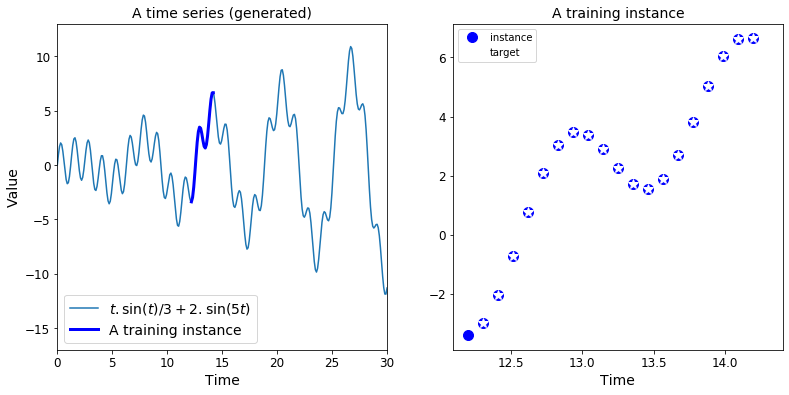

In [41]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.title("A time series (generated)",fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 .\sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-",linewidth=3,label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0,30,-17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [42]:
X_batch, y_batch = next_batch(1, n_steps)

In [43]:
np.c_[X_batch[0],y_batch[0]]

array([[ 1.38452097,  2.05081182],
       [ 2.05081182,  2.29742291],
       [ 2.29742291,  2.0465599 ],
       [ 2.0465599 ,  1.34009916],
       [ 1.34009916,  0.32948704],
       [ 0.32948704, -0.76115235],
       [-0.76115235, -1.68967022],
       [-1.68967022, -2.25492776],
       [-2.25492776, -2.34576159],
       [-2.34576159, -1.96789418],
       [-1.96789418, -1.24220428],
       [-1.24220428, -0.37478448],
       [-0.37478448,  0.39387907],
       [ 0.39387907,  0.84815766],
       [ 0.84815766,  0.85045064],
       [ 0.85045064,  0.3752526 ],
       [ 0.3752526 , -0.48422846],
       [-0.48422846, -1.53852738],
       [-1.53852738, -2.54795941],
       [-2.54795941, -3.28097239]])

In [44]:
reset_graph()

n_steps = 20 
n_inputs = 1 
n_neurons = 100
n_outputs = 1 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
output, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [45]:
reset_graph()

n_steps = 20 
n_inputs = 1 
n_neurons = 100
n_outputs = 1 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [46]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [47]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [48]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [49]:
saver = tf.train.Saver()

In [50]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, "\tMSE:",mse)
        
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess,"./my_time_series_model")

0 	MSE: 11.967253
100 	MSE: 0.52263886
200 	MSE: 0.15053195
300 	MSE: 0.0735446
400 	MSE: 0.065232664
500 	MSE: 0.05895402
600 	MSE: 0.052806254
700 	MSE: 0.047725674
800 	MSE: 0.049733147
900 	MSE: 0.047162168
1000 	MSE: 0.047191024
1100 	MSE: 0.04825293
1200 	MSE: 0.04377953
1300 	MSE: 0.049414285
1400 	MSE: 0.042101134


In [51]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [52]:
y_pred

array([[[-3.408362  ],
        [-2.4530587 ],
        [-1.100431  ],
        [ 0.79608244],
        [ 2.1693842 ],
        [ 3.1263018 ],
        [ 3.4925284 ],
        [ 3.3422866 ],
        [ 2.9446158 ],
        [ 2.2688816 ],
        [ 1.6496732 ],
        [ 1.5344483 ],
        [ 1.9364346 ],
        [ 2.74235   ],
        [ 3.9301147 ],
        [ 5.171458  ],
        [ 6.1609654 ],
        [ 6.6641855 ],
        [ 6.648182  ],
        [ 6.1037526 ]]], dtype=float32)

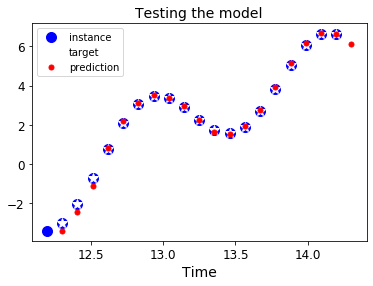

In [53]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1],time_series(t_instance[:-1]),"bo",markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]),"w*",markersize=10,label="target")
plt.plot(t_instance[1:],y_pred[0, :, 0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [54]:
reset_graph()

n_steps = 20
n_inputs = 1 
n_neurons = 100 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [55]:
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [56]:
n_outputs = 1 
learning_rate = 0.001

In [57]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [58]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [59]:
n_iterations = 1500
batch_size = 50 
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y:y_batch})
            print(iteration,"\tMSE:",mse)
            
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X:X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 13.907028
100 	MSE: 0.50593835
200 	MSE: 0.19691494
300 	MSE: 0.10270858
400 	MSE: 0.06755008
500 	MSE: 0.06263431
600 	MSE: 0.05748186
700 	MSE: 0.050878774
800 	MSE: 0.050539862
900 	MSE: 0.04887082
1000 	MSE: 0.048411
1100 	MSE: 0.05075207
1200 	MSE: 0.041940015
1300 	MSE: 0.050116863
1400 	MSE: 0.04359758


In [60]:
y_pred

array([[[-3.4320447 ],
        [-2.4603403 ],
        [-1.0908782 ],
        [ 0.69229513],
        [ 2.106633  ],
        [ 3.0439415 ],
        [ 3.4625683 ],
        [ 3.3371568 ],
        [ 2.774552  ],
        [ 2.168086  ],
        [ 1.6865069 ],
        [ 1.5348289 ],
        [ 1.8686756 ],
        [ 2.6931615 ],
        [ 3.831491  ],
        [ 5.071423  ],
        [ 6.07365   ],
        [ 6.6187963 ],
        [ 6.5740943 ],
        [ 5.9819202 ]]], dtype=float32)

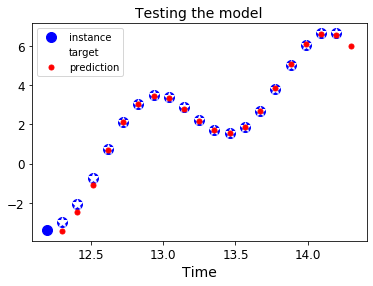

In [61]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]),"w*",markersize=10, label="target")
plt.plot(t_instance[1:],y_pred[0, :, 0],"r.",markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [62]:
with tf.Session() as sess:                        # not shown in the book
    saver.restore(sess, "./my_time_series_model") # not shown

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


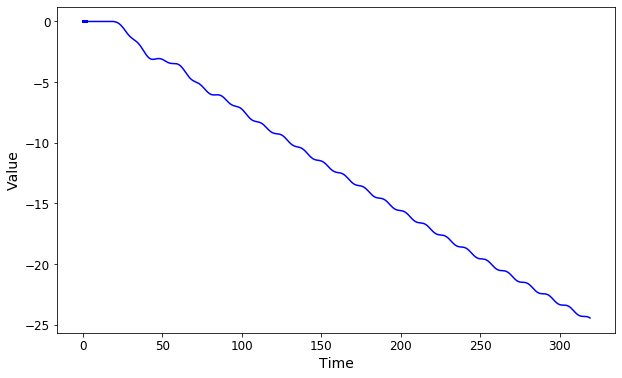

In [63]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-",linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


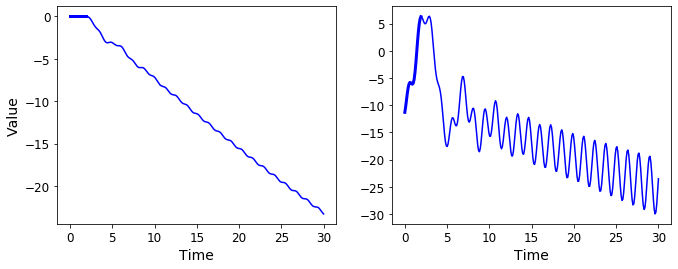

In [64]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])
        
    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X:X_batch})
        sequence2.append(y_pred[0,-1, 0])
        
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps],"b-", linewidth=3)
plt.xlabel("Time")
plt.show()

In [65]:
reset_graph()

n_inputs = 2 
n_steps = 5 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [66]:
n_neurons = 100
n_layers = 3

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [67]:
init = tf.global_variables_initializer()

In [68]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [69]:
with tf.Session() as sess: 
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X:X_batch})

In [70]:
outputs_val.shape

(2, 5, 100)

In [71]:
class DeviceCellWrapper(tf.nn.rnn_cell.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device

  @property
  def state_size(self):
    return self._cell.state_size

  @property
  def output_size(self):
    return self._cell.output_size

  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
        return self._cell(inputs, state, scope)

In [72]:
reset_graph()

n_inputs = 5 
n_steps = 20 
n_neurons = 100

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

In [73]:
devices = ["/cpu:0","/gpu:0"]
cells = [DeviceCellWrapper(dev,tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons))
         for dev in devices]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [74]:
init = tf.global_variables_initializer()

In [75]:
with tf.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict = {X: np.random.rand(2, n_steps, n_inputs)}))

[[[ 0.14844073  0.20282054 -0.0580929  ... -0.06699625 -0.0318111
   -0.07022246]
  [ 0.34616518  0.1416544  -0.3119657  ... -0.15831852 -0.07547127
   -0.04781476]
  [ 0.56098163  0.06902362 -0.09566773 ... -0.02249547 -0.02447753
   -0.05434139]
  ...
  [ 0.5313167   0.3380269  -0.45433214 ...  0.40424323  0.06782946
    0.09355228]
  [ 0.56673133 -0.00152232 -0.46291146 ...  0.02378296 -0.02305469
   -0.35127944]
  [ 0.58120203  0.07190741 -0.27156895 ... -0.05730395 -0.00675513
   -0.16888973]]

 [[-0.01231764  0.1604454  -0.04668051 ... -0.07001156  0.03850529
   -0.04053881]
  [ 0.3525877  -0.00321497 -0.12165387 ... -0.1384915  -0.09383
    0.04813248]
  [ 0.31901965  0.4412077  -0.21188007 ... -0.22503982  0.03914838
    0.04402092]
  ...
  [ 0.6673652   0.34938177 -0.38203523 ...  0.39634967 -0.19549325
   -0.0630895 ]
  [ 0.4628042   0.46147582 -0.2840237  ...  0.40519112  0.04165544
    0.1646616 ]
  [ 0.5650892   0.4029134  -0.3640245  ...  0.30295447  0.10081438
   -0.1578

In [76]:
reset_graph()

n_inputs = 1 
n_neurons = 100
n_layers = 3 
n_steps = 20 
n_outputs = 1

In [77]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [78]:
keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
        for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob)
             for cell in cells]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [79]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs -y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [80]:
n_iterations = 1500
batch_size = 50 
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y:y_batch, keep_prob:train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
            
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 16.386942
100 Training MSE: 4.2531123
200 Training MSE: 3.3390334
300 Training MSE: 3.7288916
400 Training MSE: 2.5002012
500 Training MSE: 3.6101787
600 Training MSE: 3.600078
700 Training MSE: 3.5876698
800 Training MSE: 3.5124667
900 Training MSE: 3.6093981
1000 Training MSE: 3.8952096
1100 Training MSE: 3.5472076
1200 Training MSE: 3.042549
1300 Training MSE: 2.915924
1400 Training MSE: 3.6997113


In [81]:
with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


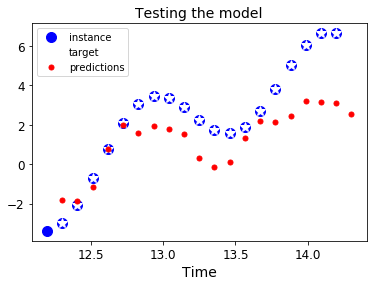

In [82]:
plt.title("Testing the model",fontsize=14)
plt.plot(t_instance[:-1],time_series(t_instance[:-1]), "bo",markersize=10,label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*",markersize=10,label="target")
plt.plot(t_instance[1:], y_pred[0, :, 0], "r.",markersize=10, label="predictions")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [83]:
reset_graph()

lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)

In [84]:
n_steps = 28 
n_inputs = 28
n_neurons = 150 
n_outputs = 10 
n_layers = 3 

learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [85]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [86]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [87]:
n_epochs = 10 
batch_size = 150 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Last batch accuracy:", acc_batch,"Test accuracy",acc_test)
        

0 Last batch accuracy: 0.10666667 Test accuracy 0.1165
1 Last batch accuracy: 0.093333334 Test accuracy 0.1183
2 Last batch accuracy: 0.1 Test accuracy 0.1202
3 Last batch accuracy: 0.15333334 Test accuracy 0.1218
4 Last batch accuracy: 0.12666667 Test accuracy 0.1283
5 Last batch accuracy: 0.16666667 Test accuracy 0.1477
6 Last batch accuracy: 0.12666667 Test accuracy 0.1739
7 Last batch accuracy: 0.14 Test accuracy 0.2033
8 Last batch accuracy: 0.22666667 Test accuracy 0.2283
9 Last batch accuracy: 0.26 Test accuracy 0.2485


In [88]:
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=n_neurons, use_peepholes=True)

In [89]:
gru_cell = tf.nn.rnn_cell.GRUCell(num_units=n_neurons)

In [90]:
from six.moves import urllib 

import errno 
import os 
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL =  'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise
            
def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path,"words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [91]:
words = fetch_words_data()

In [92]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [93]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [94]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [95]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081,   12,    6,  195,    2, 3134,   46,   59]])

'cycles originated as a term of abuse first used'

In [96]:
words[24],data[24]

('culottes', 0)

In [97]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [98]:
np.random.seed(42)

In [99]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [100]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195]),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [101]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]]),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

In [102]:
batch_size = 128 
embedding_size = 128 
skip_window = 1 
num_skips = 2 

valid_size = 16 
valid_window = 100 
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64

learning_rate = 0.01

In [103]:
reset_graph()

train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [104]:
vocabulary_size = 50000
embedding_size = 150 

init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [105]:
train_inputs = tf.placeholder(tf.int32,shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [106]:
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights,nce_biases,train_labels,embed,num_sampled,vocabulary_size))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings),axis=1,keepdims=True))
normalized_embeddings = embeddings / norm 
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

init = tf.global_variables_initializer()

In [107]:
num_steps = 10001

with tf.Session() as session:
    init.run()
    
    average_loss = 0 
    for step in range(num_steps):
        print("\rIteration: {}".format(step),end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips,skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels:batch_labels}
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val
        
        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
                print("Average loss at stop",step,": ",average_loss)
                average_loss = 0
            if step % 10000 == 0:
                sim = similarity.eval()
                for i in range(valid_size):
                    valid_word = vocabulary[valid_examples[i]]
                    top_k = 8
                    nearest = (-sim[i, :]).argsort()[1:top_k+1]
                    log_str = "Nearest to %s:" % valid_word
                    for k in range(top_k):
                        close_word = vocabulary[nearest[k]]
                        log_str = "%s %s," % (log_str, close_word)
                    print(log_str)
    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Nearest to over: tt, tuned, manichaeans, fractional, cambridge, balaguer, fluoride, strenuously,
Nearest to one: imagines, tijuana, hindrance, motorcyclist, steadfastly, lords, letting, hutchinson,
Nearest to were: bezier, antibodies, nicknamed, panthers, compiler, tao, smarter, busy,
Nearest to may: failure, rna, efficacious, aspirin, lecompton, definitive, geese, amphibious,
Nearest to two: annihilate, bettors, wir, cindy, epinephrine, team, voluntarily, crystallize,
Nearest to its: knob, abeokuta, bracelet, bastards, ivens, objectivity, blanton, cold,
Nearest to than: lame, watts, stones, sram, elves, zarqawi, applets, cloves,
Nearest to these: pedro, condoned, neck, ssn, supervising, doug, thereto, melton,
Nearest to they: lowly, deportation, shrewd, reznor, tojo, decadent, occured, risotto,
Nearest to is: interests, golfers, dropouts, richards, egyptians, legionnaires, leonel, opener,
Nearest to up: clair, drives, steadfast, missed, nashville, vinland, kilowatts, anal

In [108]:
np.save("./my_final_embeddings.npy",final_embeddings)

In [109]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

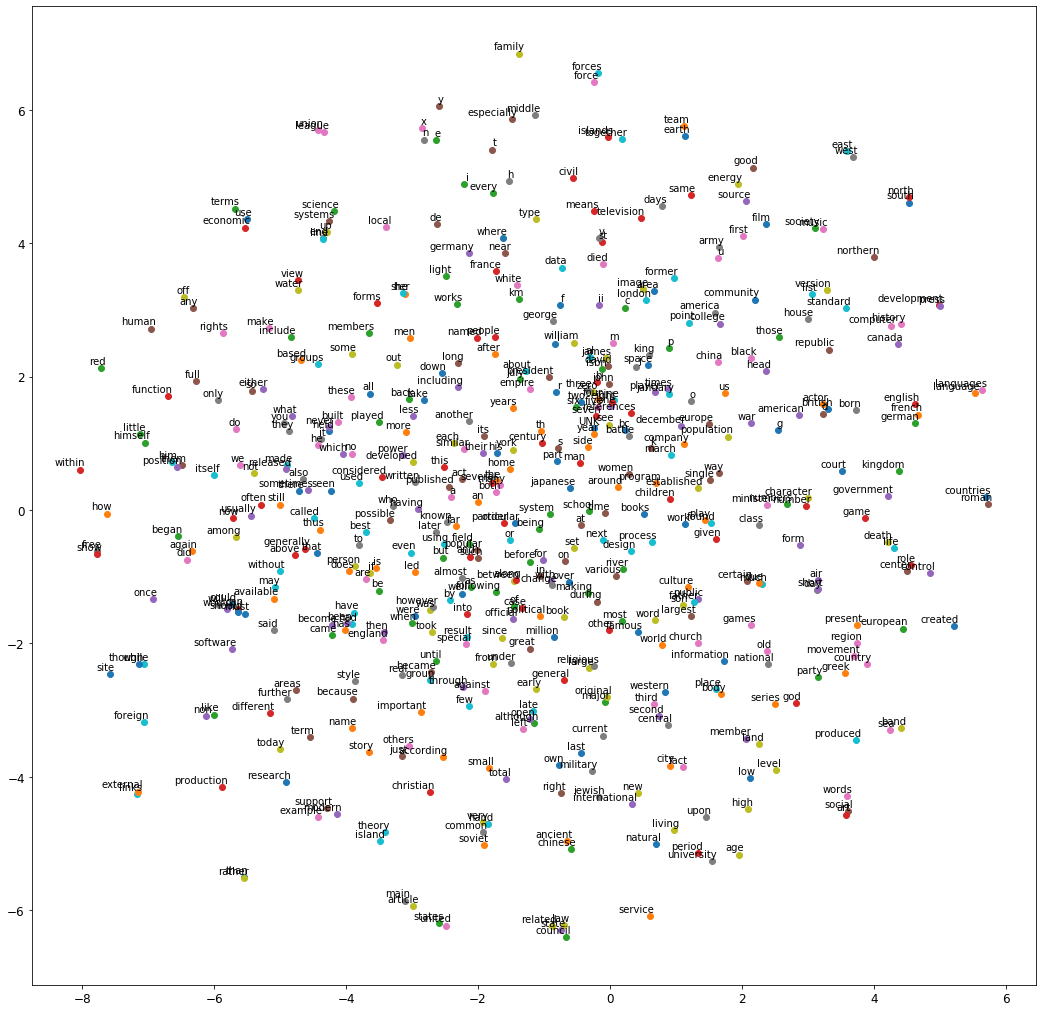

In [110]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [111]:
import tensorflow as tf 
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3 
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps])
Y = tf.placeholder(tf.int32, [None, n_steps])
W = tf.placeholder(tf.float32, [None,n_steps - 1 ,1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X))
decoder_inputs = tf.unstack(tf.transpose(Y_input))

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) 
             for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

In [112]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat,logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

Ex. 1 

In [113]:
np.random.seed(42)

default_reber_grammar = [
    [("B",1)],
    [("T",2),("P",3)],
    [("S",2),("X",4)],
    [("T", 3), ("V", 5)],
    [("X", 3), ("S", 6)],
    [("P", 4), ("V", 6)],
    [("E", None)]]

embedded_reber_grammar = [
    [("B", 1)],
    [("T", 2), ("P", 3)],
    [(default_reber_grammar, 4)],
    [(default_reber_grammar, 5)],
    [("T", 6)],
    [("P", 6)],
    [("E", None)]]    

def generate_string(grammar):
    state = 0
    output = []
    while state is not None:
        index = np.random.randint(len(grammar[state]))
        production, state = grammar[state][index]
        if isinstance(production, list):
            production = generate_string(grammar=production)
        output.append(production)
    return "".join(output)

In [114]:
for _ in range(25):
    print(generate_string(default_reber_grammar), end = " ")

BTXXTTVPXTVPXTTVPSE BPVPSE BTXSE BPVVE BPVVE BTSXSE BPTVPXTTTVVE BPVVE BTXSE BTXXVPSE BPTTTTTTTTVVE BTXSE BPVPSE BTXSE BPTVPSE BTXXTVPSE BPVVE BPVVE BPVVE BPTTVVE BPVVE BPVVE BTXXVVE BTXXVVE BTXXVPXVVE 

In [116]:
for _ in range(25):
    print(generate_string(embedded_reber_grammar),end=" ")

BTBPVVETE BTBTSSSSSSSXXVVETE BPBTSSSXXTTTTVPSEPE BTBPTTVVETE BPBTXXTVVEPE BTBTXSETE BPBTSSSSSXXTTVPXVPXTTTVVEPE BPBTSSXXTVPSEPE BPBPTTTTTTTVPSEPE BTBTSXSETE BPBPTVPXVVEPE BPBPVVEPE BPBPTVVEPE BTBPTTVPXTTVPSETE BTBTSSXSETE BTBTXXTTVVETE BPBTSXSEPE BPBPTVPSEPE BTBPVVETE BPBTXXTTTVPXTVVEPE BPBPTTVPXTVVEPE BTBPVVETE BPBPTVPXVPXTVVEPE BTBPVVETE BPBTSXSEPE 

In [117]:
def generate_corrupted_string(grammar, chars="BEPSTVX"):
    good_string = generate_string(grammar)
    index = np.random.randint(len(good_string))
    good_char = good_string[index]
    bad_char = np.random.choice(sorted(set(chars) - set(good_char)))
    return good_string[:index] + bad_char + good_string[index + 1:]

In [118]:
for _ in range(25):
    print(generate_corrupted_string(embedded_reber_grammar), end=" ")

BTTTXXVVETE BPBTXXSPXTVVEPE BTBTXSPTE BPTTSXXTVPXVVEPE PPBPVPSEPE BTBPTVETE BPTTSSSSSXSEPE BPBSVPSEPE BTBPVVESE BPBTXSEPS BEBTXSETE XPBTXXTVPSEPE BTBPVVEPE BTXPTVVETE BTBPVXETE BVBTXSETE BPTTXXVPXVPSEPE BTBPXVPSETE STBPTTVPXVPXTVPSETE BPBPTVPSESE BPBPVEEPE ETBTXSETE BTBTXSVTE BPBTXXVPSEPP BTBTXXVPSETS 

In [121]:
def string_to_one_hot_vectors(string, n_steps, chars="BEPSTVX"):
    char_to_index = {char: index for index, char in enumerate(chars)}
    output = np.zeros((n_steps, len(chars)), dtype=np.int32)
    for index, char in enumerate(string):
        output[index, char_to_index[char]] =1.
    return output

In [122]:
string_to_one_hot_vectors("BTBTXSETE", 12)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [123]:
def generate_dataset(size):
    good_strings = [generate_string(embedded_reber_grammar)
                   for _ in range(size // 2 )]
    bad_strings  = [generate_corrupted_string(embedded_reber_grammar)
                   for _ in range(size - size // 2 )]
    all_strings = good_strings + bad_strings
    n_steps = max([len(string) for string in all_strings])
    X = np.array([string_to_one_hot_vectors(string, n_steps)
                 for string in all_strings])
    seq_length = np.array([len(string) for string in all_strings])
    y = np.array([[1] for _ in range(len(good_strings))] + 
                 [[0] for _ in range(len(bad_strings))])
    rnd_idx = np.random.permutation(size)
    return X[rnd_idx], seq_length[rnd_idx], y[rnd_idx]

In [124]:
X_train, l_train, y_train = generate_dataset(10000)

In [125]:
X_train[0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0,

In [126]:
l_train[0]

23

In [127]:
y_train[0]

array([0])

In [137]:
reset_graph()

possible_chars = "BEPSTVX"
n_inputs = len(possible_chars)
n_neurons = 30 
n_outputs = 1 

learning_rate = 0.02 
momentum = 0.95

X = tf.placeholder(tf.float32, [None, None, n_inputs], name="X")
seq_length = tf.placeholder(tf.int32, [None], name="seq_length")
y = tf.placeholder(tf.float32, [None, 1], name="y")

gru_cell = tf.nn.rnn_cell.GRUCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(gru_cell, X, dtype=tf.float32,sequence_length=seq_length)

logits = tf.layers.dense(states, n_outputs,  name="logits")
y_pred = tf.cast(tf.greater(logits, 0.), tf.float32, name="y_proba")
y_proba = tf.nn.sigmoid(logits, name="y_proba")

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                      momentum=momentum,
                                      use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y, name="correct")
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [130]:
X_val, l_val, y_val = generate_dataset(5000)

In [134]:
n_epochs = 50
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(X_train, len(X_train) // batch_size)
        l_batches = np.array_split(l_train, len(l_train) // batch_size)
        y_batches = np.array_split(y_train, len(y_train) // batch_size)
        for X_batch, l_batch, y_batch in zip(X_batches, l_batches, y_batches):
            loss_val, _ = sess.run(
                [loss, training_op],
                feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, seq_length: l_val, y: y_val})
        print("{:4d}  Train loss: {:.4f}, accuracy: {:.2f}%  Validation accuracy: {:.2f}%".format(
            epoch, loss_val, 100 * acc_train, 100 * acc_val))
        saver.save(sess, "./my_reber_classifier")

   0  Train loss: 0.6727, accuracy: 66.00%  Validation accuracy: 59.34%
   1  Train loss: 0.6553, accuracy: 68.00%  Validation accuracy: 61.82%
   2  Train loss: 0.6200, accuracy: 76.00%  Validation accuracy: 72.50%
   3  Train loss: 0.4908, accuracy: 82.00%  Validation accuracy: 73.22%
   4  Train loss: 0.4219, accuracy: 86.00%  Validation accuracy: 80.44%
   5  Train loss: 0.3338, accuracy: 88.00%  Validation accuracy: 85.14%
   6  Train loss: 0.5825, accuracy: 78.00%  Validation accuracy: 74.50%
   7  Train loss: 0.5074, accuracy: 80.00%  Validation accuracy: 77.66%
   8  Train loss: 0.3582, accuracy: 86.00%  Validation accuracy: 89.52%
   9  Train loss: 0.5121, accuracy: 80.00%  Validation accuracy: 80.90%
  10  Train loss: 0.1214, accuracy: 98.00%  Validation accuracy: 95.78%
  11  Train loss: 0.0856, accuracy: 98.00%  Validation accuracy: 97.10%
  12  Train loss: 0.0386, accuracy: 100.00%  Validation accuracy: 98.02%
  13  Train loss: 0.0141, accuracy: 100.00%  Validation accurac

In [138]:
test_strings = [
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE",
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE"]
l_test = np.array([len(s) for s in test_strings])
max_length = l_test.max()
X_test = [string_to_one_hot_vectors(s, n_steps=max_length)
          for s in test_strings]

with tf.Session() as sess:
    saver.restore(sess, "./my_reber_classifier")
    y_proba_val = y_proba.eval(feed_dict={X: X_test, seq_length: l_test})

print()
print("Estimated probability that these are Reber strings:")
for index, string in enumerate(test_strings):
    print("{}: {:.2f}%".format(string, 100 * y_proba_val[index][0]))

INFO:tensorflow:Restoring parameters from ./my_reber_classifier

Estimated probability that these are Reber strings:
BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE: 1.04%
BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE: 99.98%
